<a href="https://colab.research.google.com/github/rheyavlan/MachineLearning/blob/main/Solution/rrv7869_MLSolution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

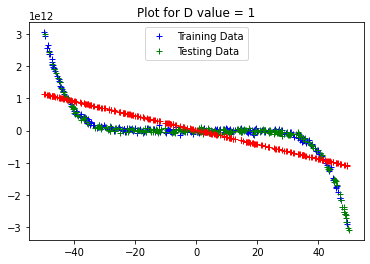

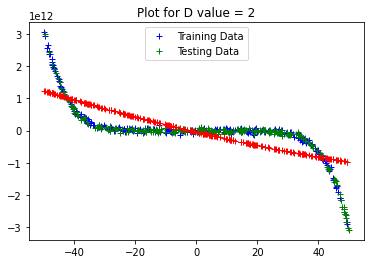

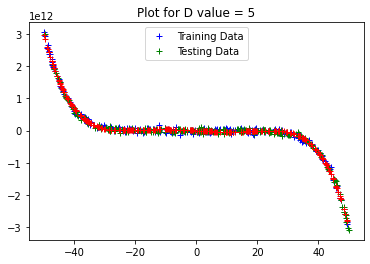

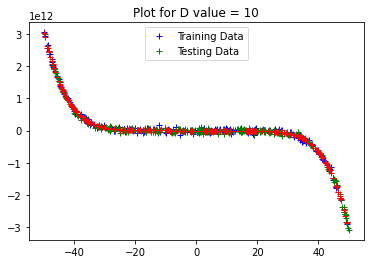

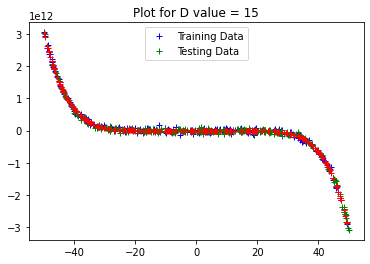

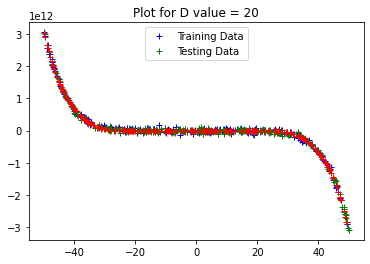

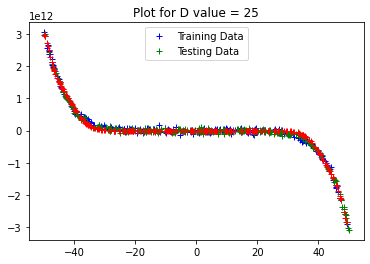

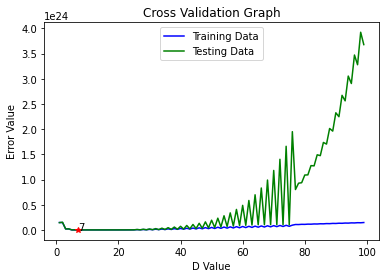

In [78]:
from scipy.io import loadmat 
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.linalg import inv,pinv
import matplotlib.pyplot as plt

"""
 Finds a D-1 order polynomial fit to the data

function [err,model,errT] = polyreg(x,y,D,xT,yT)

 x = vector of input scalars for training
 y = vector of output scalars for training
 D = the order plus one of the polynomial being fit
 xT = vector of input scalars for testing
 yT = vector of output scalars for testing
 err = average squared loss on training
 model = vector of polynomial parameter coefficients
 errT = average squared loss on testing

 Example Usage:

 x = 3*(rand(50,1)-0.5);
 y = x.*x.*x-x+rand(size(x));
 [err,model] = polyreg(x,y,4);
"""

training_label = "Training Data"
testing_label = "Testing Data"

def polyreg(x, y, D, xT, yT):

    #Finds a D-1 order polynomial fit to the data where  
    #D = the order plus one of the polynomial being fit
    D_power = np.array(range(D+1))

    #Calculate x to the power D
    X_train = np.power(x, D_power)
    
    #model = vector of polynomial parameter coefficients
    model = np.linalg.pinv(X_train).dot(y)
    
    #err = average squared loss on training
    err = (0.5/X_train.shape[0])*np.sum(np.power(y-X_train.dot(model),2))

    #Calculate x to the power D
    X_test = np.power(xT, D_power)

    #Choosing 0,1,2,5,10,15,20,25 as D values 
    if D in (0,1,2,5,10,15,20,25):
        
        plt.figure(D)
        plt.title('Plot for D value = '+str(D))
        
        plt.plot(x, y, 'b+', label=training_label)
        plt.plot(xT, yT, 'g+', label=testing_label)

        plt.plot(x, X_train.dot(model), 'r+')
        
        plt.legend(loc='upper center')
        plt.show()

    #errT = average squared loss on testing    
    errT = (0.5/X_test.shape[0])*np.sum(np.power(y_test-X_test.dot(model),2))
    return err, errT


if __name__=="__main__":

    #Load MATLAB file problem1 consisting for 500 records for x and y of dataType Double 
    given_data = loadmat('problem1.mat')
    x = given_data['x']
    y = given_data['y']

    #Divide the data set into training and testing data after shuffling. 50% Training and 50% Testing 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=False)

    #let us take the maximum dimension value to be 100 for a dataset of 500 records
    max_dimension = 100

    #Call the function polyreg 
    errors = [polyreg(x_train, y_train, i, x_test, y_test) for i in range(1,max_dimension)]

    #Get training and testing errors from the value returned by the polyreg function 
    err = [e[0] for e in errors]
    errT  = [e[1] for e in errors]

    #Return index of the minimum element of the test error array 
    minimum_test_error = np.argmin(errT)

    #We use matplotlib.lines.Line2D
    plt.figure(0)
    plt.xlabel('D Value'); 
    plt.ylabel('Error Value')
    plt.title('Cross Validation Graph')

    train_line, = plt.plot(range(1,max_dimension), err,'blue',label=training_label)
    test_line,  = plt.plot(range(1,max_dimension), errT, 'green',label=testing_label)

    #Highlight the value of D
    plt.plot(minimum_test_error, errT[minimum_test_error], 'r*')
    plt.text(minimum_test_error, errT[minimum_test_error], minimum_test_error)

    plt.legend(handles=[train_line, test_line], loc='upper center')
    plt.show()